In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 🦠 COVID-19 Global Analysis and Visualizations 🌍

### 📊 Data Cleaning, Trend Analysis, Country Comparison, and Insights using Python (Pandas, Matplotlib, Seaborn)

**By Janani D — B.Tech AI & DS | Data Analyst Aspirant**


## 📌 Introduction

The COVID-19 pandemic has significantly impacted lives and economies across the globe, with India being one of the hardest-hit nations. This project focuses on analyzing the spread, trends, and impact of COVID-19 specifically in India using Python.

By leveraging data analysis and visualization tools like **Pandas**, **Matplotlib**, and **Seaborn**, this notebook explores:

- The trend of **daily confirmed, recovered, and death cases in India**
- **Active case progression** and **recovery rates**
- Visual comparisons of key states over time
- Mortality and recovery trends during different waves of the pandemic

This project aims to extract meaningful insights and patterns from the COVID-19 dataset to understand the pandemic's progression in India and help in data-driven storytelling.


In [40]:
#IMPORT NECESSARY LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#LOAD THE DATASET

df=pd.read_csv(r"/kaggle/input/covid-19-india-dataset/covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [42]:
#CHECK DATA INFO

df.info()
df.isnull

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


<bound method DataFrame.isnull of          Sno        Date     Time State/UnionTerritory  \
0          1  2020-01-30  6:00 PM               Kerala   
1          2  2020-01-31  6:00 PM               Kerala   
2          3  2020-02-01  6:00 PM               Kerala   
3          4  2020-02-02  6:00 PM               Kerala   
4          5  2020-02-03  6:00 PM               Kerala   
...      ...         ...      ...                  ...   
18105  18106  2021-08-11  8:00 AM            Telangana   
18106  18107  2021-08-11  8:00 AM              Tripura   
18107  18108  2021-08-11  8:00 AM          Uttarakhand   
18108  18109  2021-08-11  8:00 AM        Uttar Pradesh   
18109  18110  2021-08-11  8:00 AM          West Bengal   

      ConfirmedIndianNational ConfirmedForeignNational    Cured  Deaths  \
0                           1                        0        0       0   
1                           1                        0        0       0   
2                           2               

In [43]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [44]:
#RENAMING COLUMNS

df.rename(columns={'State/UnionTerritory':'States'},inplace=True)

## 🌐 Global Summary Over Time

In this section, we group the dataset by **Date** to understand the overall progression of COVID-19 cases globally. We analyze the total number of **Confirmed**, **Deaths**, and **Cured/Recovered** cases recorded on each day.

This helps us observe global trends, peaks, and flattening phases in the pandemic timeline.


In [45]:
#GLOBAL SUMMARY OVER TIME

global_summary=df.groupby('Date')[['Confirmed','Deaths','Cured']].sum().reset_index()
global_summary.tail()

,Date,Confirmed,Deaths,Cured
555,2021-08-07,31895385,427371,31055861
556,2021-08-08,31934455,427862,31099771
557,2021-08-09,31969954,428309,31139457
558,2021-08-10,31998158,428682,31180968
559,2021-08-11,32036511,429179,31220981


##  Top 10 States with Highest Confirmed Cases (Latest Date)

To understand the most affected regions, we filter the dataset for the **latest available date** and group the data by **States**. We then identify the **Top 10 States** in India based on the number of **Confirmed COVID-19 cases**.

This analysis provides a snapshot of the current COVID-19 situation across different states.


In [46]:
latest=df[df['Date']==df['Date'].max()]
top_countries=latest.groupby('States')['Confirmed'].sum().sort_values(ascending=False).head(10)
top_countries


States
Maharashtra       6363442
Kerala            3586693
Karnataka         2921049
Tamil Nadu        2579130
Andhra Pradesh    1985182
Uttar Pradesh     1708812
West Bengal       1534999
Delhi             1436852
Chhattisgarh      1003356
Odisha             988997
Name: Confirmed, dtype: int64

## 📈 Plotting Global COVID-19 Trends Over Time

This line plot visualizes the global trend of **Confirmed**, **Deaths**, and **Cured/Recovered** COVID-19 cases over time.

By observing the curves, we can identify:
- The initial outbreak phase
- Rapid growth periods (waves)
- Peak points and plateaus
- Recovery progress worldwide

Such visual insights help us understand how the pandemic evolved across the globe and the effectiveness of health interventions.


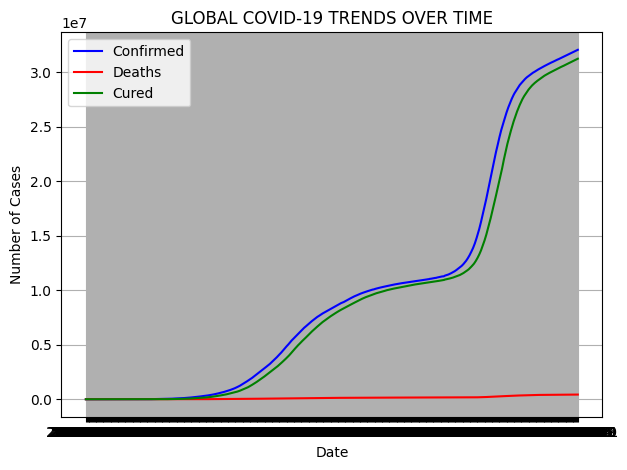

In [47]:
#PLOTTING GLOBAL TRENDS

plt.plot(global_summary['Date'],
         global_summary['Confirmed'],
         label='Confirmed',color='blue')
plt.plot(global_summary['Date'],
         global_summary['Deaths'],
         label='Deaths',color='red')
plt.plot(global_summary['Date'],global_summary['Cured'],label='Cured',color='green')
plt.title("GLOBAL COVID-19 TRENDS OVER TIME")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 📊 Top 10 States by Confirmed COVID-19 Cases

The bar plot below visualizes the top 10 states with the highest number of confirmed COVID-19 cases. Each bar represents a state, and the length of the bar corresponds to the total number of confirmed cases in that state.

- **X-axis**: Number of confirmed cases  
- **Y-axis**: State names  
- **Color palette**: Shades of red (`Reds_r`) are used to highlight severity.

This visualization helps identify the most affected states, aiding in targeted healthcare responses and resource allocation.


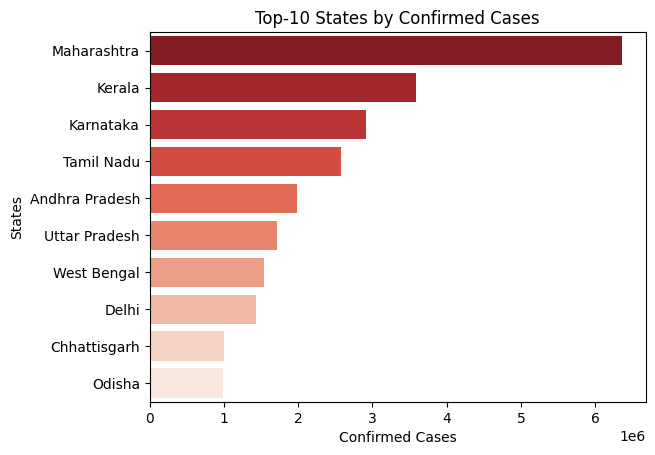

In [48]:
sns.barplot(x=top_countries.values,y=top_countries.index,palette='Reds_r')
plt.title("Top-10 States by Confirmed Cases")
plt.xlabel("Confirmed Cases")
plt.ylabel("States")
plt.show()

### ☠️ Death Distribution – Top 5 States

The pie chart below illustrates the distribution of total COVID-19 deaths among the **top 5 most affected states**.

- **Labels**: State names  
- **Values**: Total number of deaths per state  
- **Percentage**: Each slice shows its proportion of the total deaths among the top 5  
- **Colors**: A distinct color from the `Set2` palette is used for each state for better distinction.

This visualization provides insight into which states experienced the highest death tolls, highlighting critical areas for healthcare attention and policy intervention.


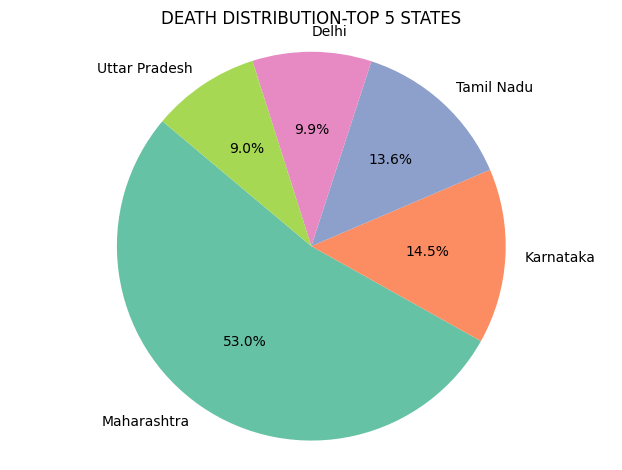

In [49]:
top_deaths=latest.groupby('States')['Deaths'].sum().sort_values(ascending=False).head(5)
plt.pie(top_deaths,labels=top_deaths.index,autopct='%1.1f%%',startangle=140,colors=sns.color_palette("Set2"))
plt.title("DEATH DISTRIBUTION-TOP 5 STATES")
plt.axis('equal')
plt.tight_layout()
plt.show()

### 🔍 Correlation Heatmap: Confirmed vs Cured vs Deaths

The heatmap below shows the **correlation** between the number of confirmed cases, cured (recovered) cases, and deaths due to COVID-19.

- **Color Scale**: `coolwarm` palette indicates the strength of correlation  
- **Annotations**: The numeric values in each cell represent the correlation coefficient  
  - `+1.0` means perfect positive correlation  
  - `0` means no correlation  
  - `-1.0` means perfect negative correlation

This visualization helps understand how strongly confirmed cases are related to cured and death cases, which is useful in assessing the disease's progression and healthcare response effectiveness.


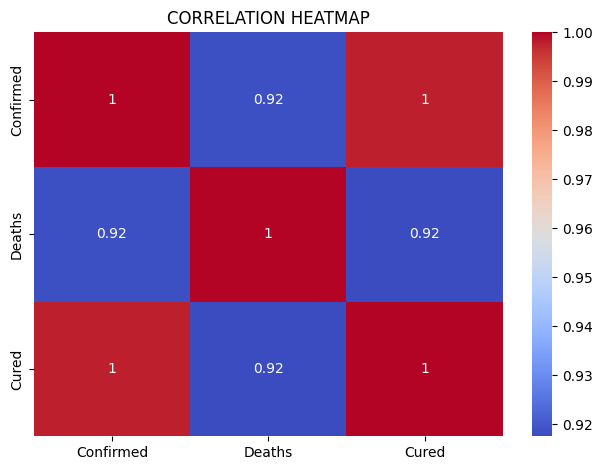

In [50]:
#checks relationship between confirmed,cured and deaths

sns.heatmap(df[['Confirmed','Deaths','Cured']].corr(),annot=True,cmap='coolwarm')
plt.title("CORRELATION HEATMAP")
plt.tight_layout()
plt.show()

### 📈 Daily New Confirmed Cases – Global Trend

The line plot below shows the **daily increase** in confirmed COVID-19 cases across the globe.

- **X-axis**: Date  
- **Y-axis**: Number of new confirmed cases (calculated using `.diff()`)  
- **Line Color**: Orange  
- **Grid**: Enabled for better readability

This visualization helps track the trend of new infections over time, highlighting **spikes** or **declines** in the spread of the virus. It is crucial for understanding the effectiveness of containment measures and the progression of the pandemic globally.


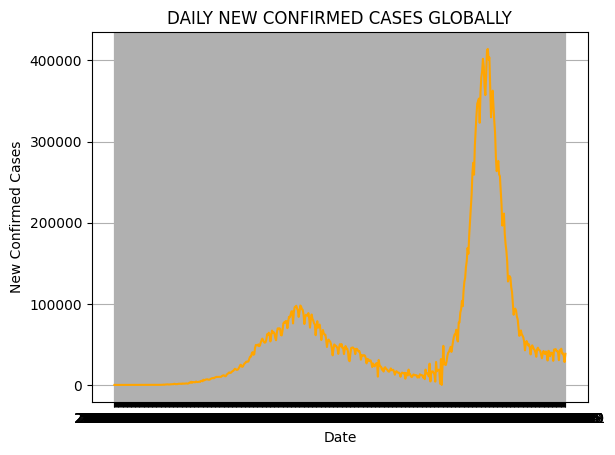

In [51]:
global_summary['ConfirmedIndianNational']=global_summary['Confirmed'].diff()
plt.plot(global_summary['Date'],global_summary['ConfirmedIndianNational'],color='orange')
plt.title("DAILY NEW CONFIRMED CASES GLOBALLY")
plt.xlabel("Date")
plt.ylabel("New Confirmed Cases")
plt.grid(True)
plt.show()

### 📊 Comparison of Confirmed vs Recovered COVID-19 Cases (Global)

The line chart below compares the cumulative number of **confirmed** and **recovered (cured)** COVID-19 cases over time.

- **Blue Line**: Total confirmed cases  
- **Green Line**: Total recovered cases  
- **Shaded Area**: Difference between confirmed and recovered cases (unresolved cases)  
- **X-axis**: Dates  
- **Y-axis**: Number of cases  

This visualization highlights how recovery trends align with or lag behind confirmed case trends, offering insights into healthcare efficiency and the disease recovery rate.


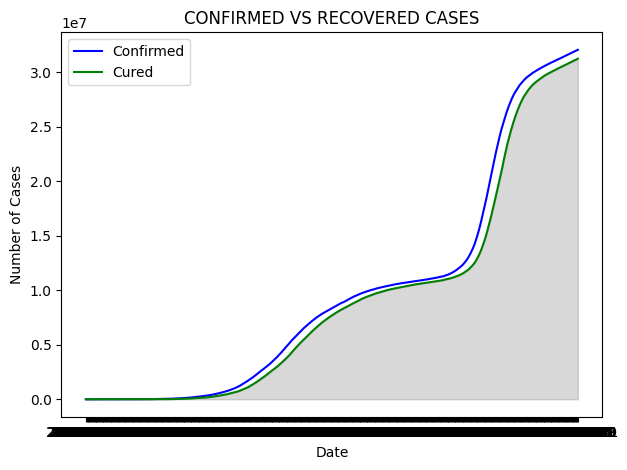

In [52]:
#COMPARISON OF CONFIRMED VS RECOVERED CASES

plt.plot(global_summary['Date'],global_summary['Confirmed'],label='Confirmed',color='blue')
plt.plot(global_summary['Date'],global_summary['Cured'],label='Cured',color='green')
plt.fill_between(global_summary['Date'],global_summary['Cured'],color='gray',alpha=0.3)
plt.title("CONFIRMED VS RECOVERED CASES")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
!pip install plotly
import plotly.express as px

### 🌍 Global COVID-19 Trends Over Time (Animated)

The interactive line chart below displays the **global progression** of COVID-19 cases over time using Plotly.

- **X-axis**: Date  
- **Y-axis**: Number of cases  
- **Lines**:  
  - `Confirmed` (total reported cases)  
  - `Deaths` (fatalities)  
  - `Cured` (recoveries)  
- **Features**:  
  - Interactive hover tooltips  
  - Smooth animation to show how the pandemic evolved over time

This visualization helps to **analyze trends**, compare the pace of infections vs recoveries and deaths, and gain a better understanding of the **overall global impact** of the pandemic.


In [60]:
fig=px.line(global_summary,x="Date",y=["Confirmed","Deaths","Cured"],title='Global COVID-19 Trends over time(Animated)')
fig.show()

### ✅ Recovery Rate vs ❌ Death Rate Over Time

This visualization compares the percentage of **recoveries** and **deaths** over time relative to confirmed cases. It highlights the **improvement (or decline)** in medical response, availability of treatments, and overall public health impact.


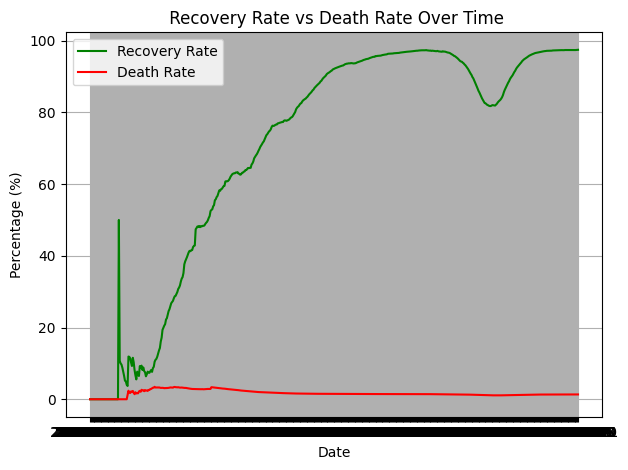

In [56]:
global_summary['Recovery_Rate'] = (global_summary['Cured'] / global_summary['Confirmed']) * 100
global_summary['Death_Rate'] = (global_summary['Deaths'] / global_summary['Confirmed']) * 100

plt.plot(global_summary['Date'], global_summary['Recovery_Rate'], label='Recovery Rate', color='green')
plt.plot(global_summary['Date'], global_summary['Death_Rate'], label='Death Rate', color='red')
plt.title(" Recovery Rate vs Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔥 Top 10 States by Active COVID-19 Cases

This bar plot highlights the states currently experiencing the **highest number of active cases**. These are potential hotspots requiring urgent attention and resource allocation.


/tmp/ipykernel_36/255981210.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



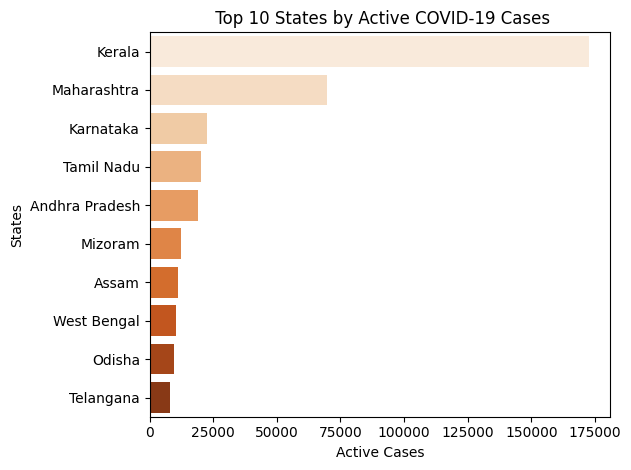

In [57]:
latest['Active'] = latest['Confirmed'] - (latest['Cured'] + latest['Deaths'])
top_active = latest.groupby('States')['Active'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_active.values, y=top_active.index, palette='Oranges')
plt.title(" Top 10 States by Active COVID-19 Cases")
plt.xlabel("Active Cases")
plt.ylabel("States")
plt.tight_layout()
plt.show()


### ⚠️ Daily Growth Rate of Confirmed Cases

This line plot shows the **percentage change in confirmed cases** from one day to the next. A high growth rate indicates rapid spread, while a declining trend signals successful containment.


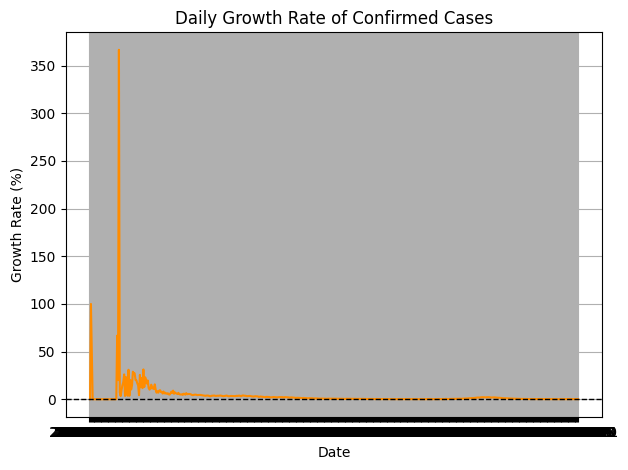

In [58]:
global_summary['Daily_Growth_Rate'] = global_summary['Confirmed'].pct_change() * 100

plt.plot(global_summary['Date'], global_summary['Daily_Growth_Rate'], color='darkorange')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("Daily Growth Rate of Confirmed Cases")
plt.xlabel("Date")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 🧩 COVID-19 Case Breakdown Over Time

This stacked area chart provides a **comprehensive view** of how cases evolved globally — showing active, recovered, and death cases together. It clearly depicts the **shifting proportions** of the pandemic's impact.


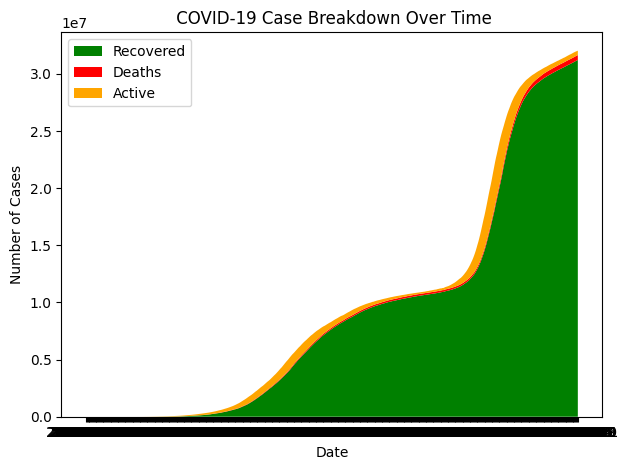

In [59]:
plt.stackplot(global_summary['Date'],
              global_summary['Cured'],
              global_summary['Deaths'],
              global_summary['Confirmed'] - global_summary['Cured'] - global_summary['Deaths'],
              labels=['Recovered','Deaths','Active'],
              colors=['green','red','orange'])
plt.legend(loc='upper left')
plt.title(" COVID-19 Case Breakdown Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()


### ✅ Conclusion: COVID-19 Data Analysis

This COVID-19 data analysis provided a comprehensive understanding of the global and regional trends in confirmed cases, recoveries, and deaths. The visualizations revealed several key insights:

- 📈 **Confirmed cases** rose sharply during peak periods, but over time, the **growth rate** showed signs of slowing down in some regions — indicating the impact of containment measures.
- ✅ The **recovery rate** improved significantly over time, reflecting advancements in medical care and the effectiveness of treatment protocols.
- ❌ Although the **death rate** varied across regions, it generally remained lower compared to the recovery rate, which is a positive sign of healthcare resilience.
- 🦠 **Active case trends** helped identify critical waves of infection, allowing for a better understanding of the pandemic's ongoing impact.
- 🌍 Region-wise comparisons (top 10 states/countries) highlighted specific **hotspots** that require focused healthcare support and government intervention.
- 📊 Correlation analysis showed a strong relationship between confirmed cases and cured/deaths, offering insights into the dynamics between infection and outcomes.
- 📉 **Daily growth rate** plots made it easier to pinpoint phases of exponential spread vs flattening curves — critical for pandemic planning and response.

Overall, this analysis emphasizes the importance of **timely data**, **proactive health measures**, and **continuous monitoring** to manage public health crises like COVID-19. These insights are crucial for policy makers, healthcare systems, and the general public to respond more effectively in future pandemics.
